In [1]:
import os
import sys
sys.path.append(os.getcwd()+"/../..")
from src import paths

import pandas as pd
import numpy as np

from datasets import load_dataset

from sklearn.metrics import f1_score, recall_score, precision_score, ConfusionMatrixDisplay, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
job_id = 3592235
output = pd.read_csv(paths.RESULTS_PATH/'ms-diag/ms_diag-llama2-chat_zero-shot_generation-strats_3595180.csv')
# Map from output to label
# Dictionary to map keywords to labels
keyword_label_mapping = {
    "rrms": 'relapsing_remitting_multiple_sclerosis',
    "spms": 'secondary_progressive_multiple_sclerosis',
    "ppms": 'primary_progressive_multiple_sclerosis',
    "remittierend": 'relapsing_remitting_multiple_sclerosis',
    "schubförmig": 'relapsing_remitting_multiple_sclerosis',
    "sekundär": 'secondary_progressive_multiple_sclerosis',
    "primär": 'primary_progressive_multiple_sclerosis',
}

# Number of columns in the results dataframe
n_cols = len(output.columns)

# Function to assign labels based on text content
def assign_label(text):
    for keyword, label in keyword_label_mapping.items():
        if keyword in text.lower():
            return label
    return "unknown"  # Default label if no keyword is found

# Assign labels to each text in the list
for col in output.columns[1:]:
    output[f'{col}_r'] = output[col].apply(assign_label)

In [3]:
# Count "unknown" labels per column
for col in output.columns[n_cols:]:
    print(f'{col}: {output[col].value_counts()["unknown"]}')

truncate_300_strategy_greedy_r: 2
truncate_300_strategy_contrastive_r: 8
truncate_300_strategy_sampling_r: 4
truncate_300_strategy_beam_r: 1
truncate_600_strategy_greedy_r: 5
truncate_600_strategy_contrastive_r: 11
truncate_600_strategy_sampling_r: 6
truncate_600_strategy_beam_r: 2
truncate_1200_strategy_greedy_r: 11
truncate_1200_strategy_contrastive_r: 21
truncate_1200_strategy_sampling_r: 13
truncate_1200_strategy_beam_r: 3


In [4]:
def calculate_metrics(cm:np.ndarray):
    """Calculate metrics from a confusion matrix. Even if matrix is not square, it will calculate metrics for each class."""
    num_classes = len(cm)

    precision = []
    recall = []
    f1_score = []

    for i in range(num_classes):
        # True Positive, False Positive, False Negative
        TP = cm[i, i]
        FP = np.sum(cm[:, i]) - TP
        FN = np.sum(cm[i, :]) - TP

        # Precision, Recall, F1 Score
        precision_i = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall_i = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score_i = 2 * precision_i * recall_i / (precision_i + recall_i) if (precision_i + recall_i) > 0 else 0

        precision.append(precision_i)
        recall.append(recall_i)
        f1_score.append(f1_score_i)

    weighted_precision = np.sum(np.array(precision) * np.sum(cm, axis=1)) / np.sum(cm)
    weighted_recall = np.sum(np.array(recall) * np.sum(cm, axis=1)) / np.sum(cm)
    weighted_f1_score = np.sum(np.array(f1_score) * np.sum(cm, axis=1)) / np.sum(cm)

    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1_score = np.mean(f1_score)

    micro_precision = np.sum(cm.diagonal()) / np.sum(cm)
    micro_recall = np.sum(cm.diagonal()) / np.sum(cm)
    micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall) if (micro_precision + micro_recall) > 0 else 0

    return {
        'weighted_precision': weighted_precision,
        'weighted_recall': weighted_recall,
        'weighted_f1_score': weighted_f1_score,
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1_score': macro_f1_score,
        'micro_precision': micro_precision,
        'micro_recall': micro_recall,
        'micro_f1_score': micro_f1_score
    }


truncate_300_strategy_greedy_r:



,weighted_precision,weighted_recall,weighted_f1_score,macro_precision,macro_recall,macro_f1_score,micro_precision,micro_recall,micro_f1_score
truncate_300_strategy_greedy_r,0.935883,0.637755,0.74113,0.493602,0.515584,0.436598,0.637755,0.637755,0.637755
truncate_300_strategy_contrastive_r,0.935883,0.637755,0.74113,0.493602,0.515584,0.436598,0.637755,0.637755,0.637755
truncate_300_strategy_sampling_r,0.935883,0.637755,0.74113,0.493602,0.515584,0.436598,0.637755,0.637755,0.637755
truncate_300_strategy_beam_r,0.935883,0.637755,0.74113,0.493602,0.515584,0.436598,0.637755,0.637755,0.637755
truncate_600_strategy_greedy_r,0.935883,0.637755,0.74113,0.493602,0.515584,0.436598,0.637755,0.637755,0.637755
truncate_600_strategy_contrastive_r,0.935883,0.637755,0.74113,0.493602,0.515584,0.436598,0.637755,0.637755,0.637755
truncate_600_strategy_sampling_r,0.935883,0.637755,0.74113,0.493602,0.515584,0.436598,0.637755,0.637755,0.637755
truncate_600_strategy_beam_r,0.935883,0.637755,0.74113,0.493602,0.515584,0.436598,0.637755,0.637755,0.637755
truncate_1200_strategy_greedy_r,0.935883,0.637755,0.74113,0.493602,0.515584,0.436598,0.637755,0.637755,0.637755
truncate_1200_strategy_contrastive_r,0.935883,0.637755,0.74113,0.493602,0.515584,0.436598,0.637755,0.637755,0.637755


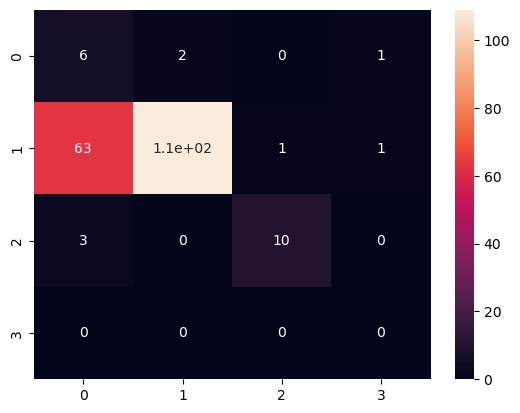

In [5]:
# Confusion matrix
labels = list(set(output["labels"])) + ["unknown"]
results = []
for col in output.columns[n_cols:]:
    print(f'{col}:')
    conf_mat = confusion_matrix(y_true=output['labels'], y_pred=output[col], labels=labels)
    sns.heatmap(conf_mat, annot=True)
    results.append(calculate_metrics(conf_mat))
    print()
    break

pd.DataFrame(results, index=output.columns[n_cols:])

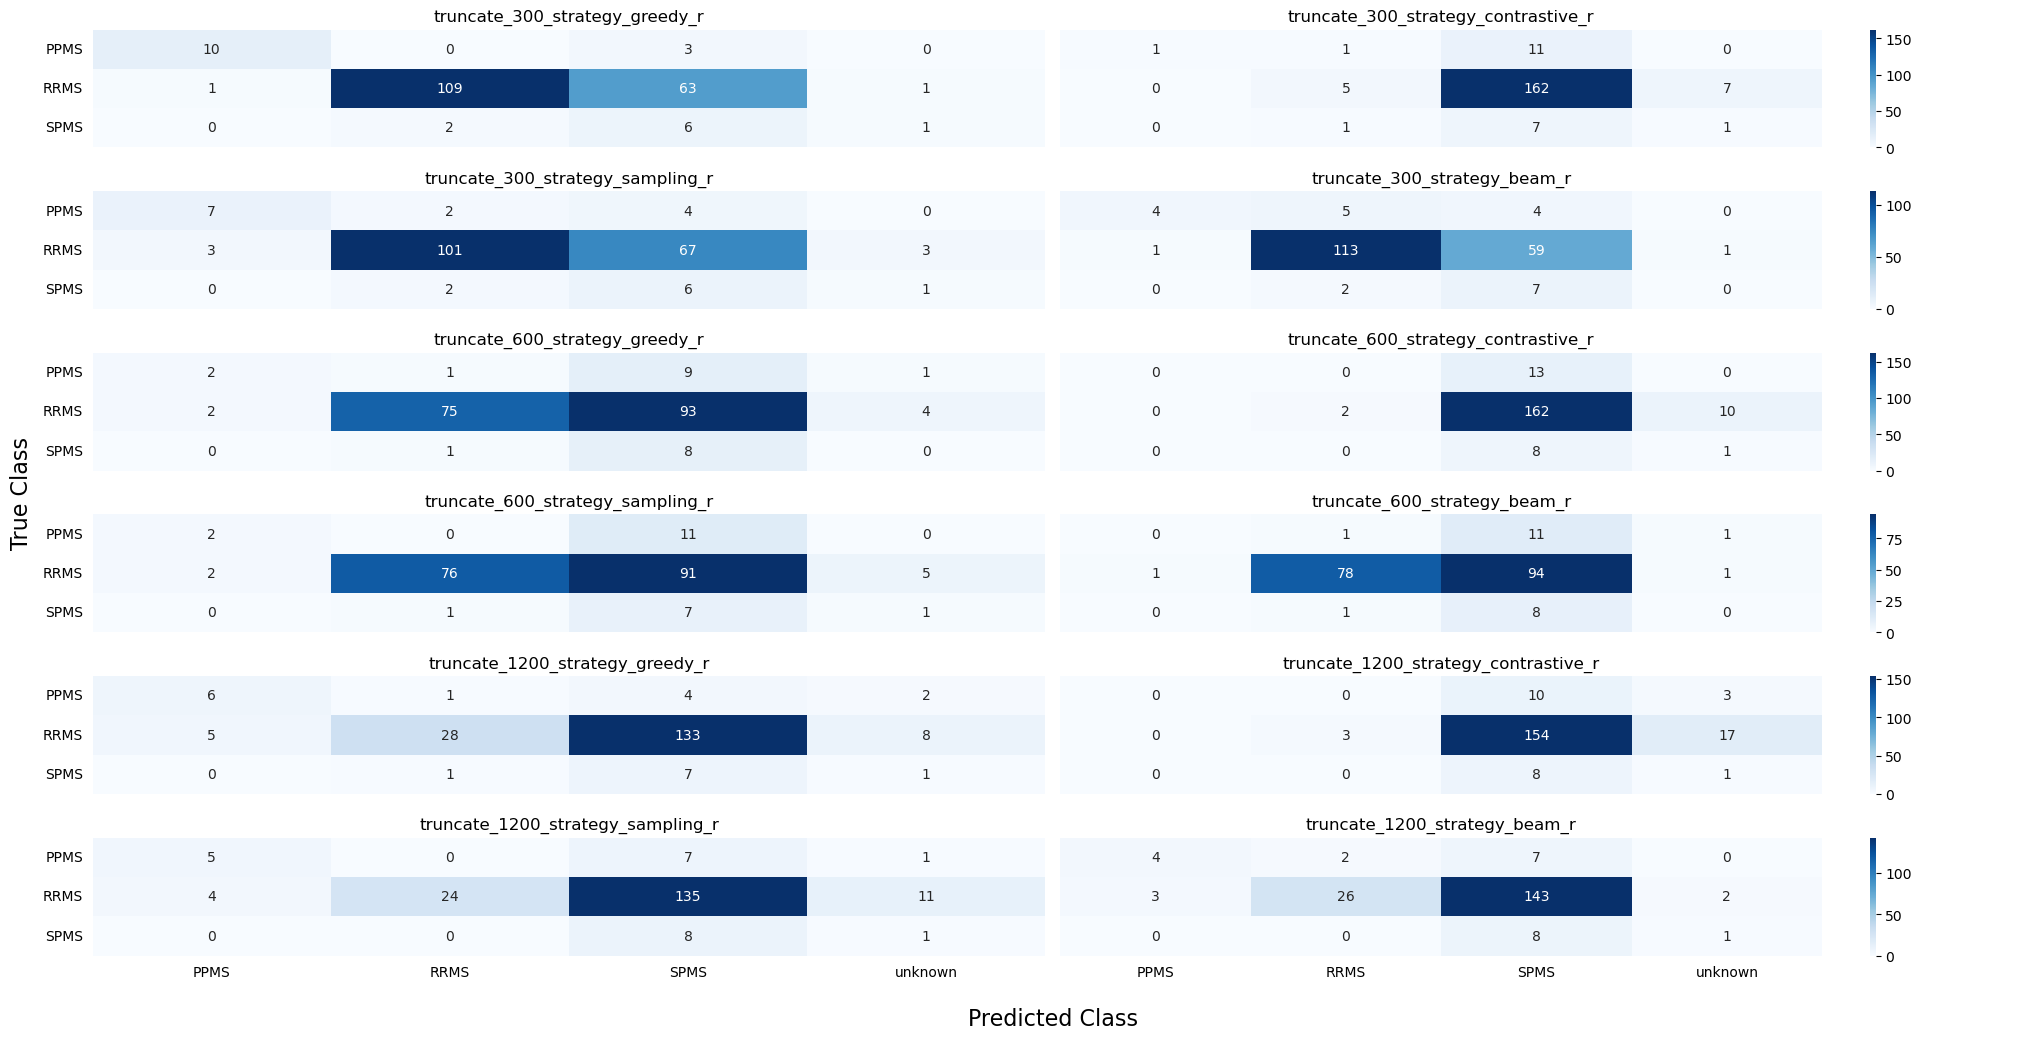

,weighted_precision,weighted_recall,weighted_f1_score,macro_precision,macro_recall,macro_f1_score,micro_precision,micro_recall,micro_f1_score
truncate_300_strategy_greedy_r,0.94,0.64,0.74,0.49,0.52,0.44,0.64,0.64,0.64
truncate_300_strategy_contrastive_r,0.70,0.07,0.06,0.44,0.22,0.07,0.07,0.07,0.07
truncate_300_strategy_sampling_r,0.90,0.58,0.69,0.43,0.45,0.37,0.58,0.58,0.58
truncate_300_strategy_beam_r,0.89,0.63,0.72,0.46,0.43,0.35,0.63,0.63,0.63
truncate_600_strategy_greedy_r,0.90,0.43,0.55,0.39,0.37,0.24,0.43,0.43,0.43
truncate_600_strategy_contrastive_r,0.89,0.05,0.02,0.26,0.23,0.03,0.05,0.05,0.05
truncate_600_strategy_sampling_r,0.91,0.43,0.56,0.39,0.34,0.24,0.43,0.43,0.43
truncate_600_strategy_beam_r,0.87,0.44,0.55,0.26,0.33,0.19,0.44,0.44,0.44
truncate_1200_strategy_greedy_r,0.87,0.21,0.28,0.38,0.35,0.22,0.21,0.21,0.21
truncate_1200_strategy_contrastive_r,0.89,0.06,0.03,0.26,0.23,0.03,0.06,0.06,0.06


In [48]:
# Your loop
labels = ['primary_progressive_multiple_sclerosis', 'relapsing_remitting_multiple_sclerosis', 'secondary_progressive_multiple_sclerosis', 'unknown']
label_names = ['PPMS', 'RRMS', 'SPMS', 'unknown']
results = []

# Set the number of columns in the grid (adjust as needed)
grid_cols = 2
grid_rows = 6

# Create subplots
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(20, 10))

for idx, col in enumerate(output.columns[n_cols:]):
    row_idx = idx // grid_cols
    col_idx = idx % grid_cols

    # Calculate confusion matrix
    conf_mat = confusion_matrix(y_true=output['labels'], y_pred=output[col], labels=labels)

    # Plot heatmap in the corresponding subplot
    sns.heatmap(conf_mat[:-1,:], ax=axes[row_idx, col_idx], annot=True, fmt='d', cmap='Blues')
    axes[row_idx, col_idx].set_title(col)
    axes[row_idx, col_idx].set(yticklabels=[])
    axes[row_idx, col_idx].set(xticklabels=[])
    axes[row_idx, col_idx].tick_params(left=False, bottom=False)

    if col_idx == 0:
        axes[row_idx, col_idx].set(yticklabels=label_names[:-1])
        plt.setp(axes[row_idx, col_idx].get_yticklabels(), rotation=0, horizontalalignment='right')
        axes[row_idx, col_idx].collections[0].colorbar.remove()
    
    if row_idx == grid_rows - 1:
        axes[row_idx, col_idx].set(xticklabels=label_names)

    
    # Calculate metrics and append to the results
    results.append(calculate_metrics(conf_mat))

# Adjust layout
plt.tight_layout()

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Predicted Class", labelpad=20, fontsize=16)
plt.ylabel("True Class", labelpad=20, fontsize=16)

# Display the grid of heatmaps
plt.show()

# Display the results in a DataFrame
results_df = pd.DataFrame(results, index=output.columns[n_cols:]).round(2)
display(results_df)


In [50]:
# Latex Table
num_strategies = 4
latex_string_first_row = r"\multirow{{4}}{{*}}{{{truncation_size}}} & {{{strategy}}} & {{{precision}}} & {{{recall}}} & {{{f1}}} \\"
latex_string_other_rows = r" & {{{strategy}}} & {{{precision}}} & {{{recall}}} & {{{f1}}} \\"

for idx, index in enumerate(results_df.index):
    truncation_size = index.split('_')[1]
    strategy = index.split('_')[3].capitalize()
    if idx %num_strategies == 0:
        print(r"\midrule")
        print(latex_string_first_row.format(truncation_size=truncation_size, strategy=strategy, precision=results_df.iloc[idx, 0], recall=results_df.iloc[idx, 1], f1=results_df.iloc[idx, 2]))
    else:
        print(latex_string_other_rows.format(strategy=strategy, precision=results_df.iloc[idx, 0], recall=results_df.iloc[idx, 1], f1=results_df.iloc[idx, 2]))

\midrule
\multirow{4}{*}{300} & {Greedy} & {0.94} & {0.64} & {0.74} \\
 & {Contrastive} & {0.7} & {0.07} & {0.06} \\
 & {Sampling} & {0.9} & {0.58} & {0.69} \\
 & {Beam} & {0.89} & {0.63} & {0.72} \\
\midrule
\multirow{4}{*}{600} & {Greedy} & {0.9} & {0.43} & {0.55} \\
 & {Contrastive} & {0.89} & {0.05} & {0.02} \\
 & {Sampling} & {0.91} & {0.43} & {0.56} \\
 & {Beam} & {0.87} & {0.44} & {0.55} \\
\midrule
\multirow{4}{*}{1200} & {Greedy} & {0.87} & {0.21} & {0.28} \\
 & {Contrastive} & {0.89} & {0.06} & {0.03} \\
 & {Sampling} & {0.93} & {0.19} & {0.25} \\
 & {Beam} & {0.86} & {0.19} & {0.26} \\
